<a href="https://colab.research.google.com/github/Mahsa-Goudarzi/ComputerVision/blob/main/M2_Image%20Segmentation/Exercise%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: IMAGE SEGMENTATION

Christian Mata, PhD

# Exercise 2

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:


🔹 **Task 1:** Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

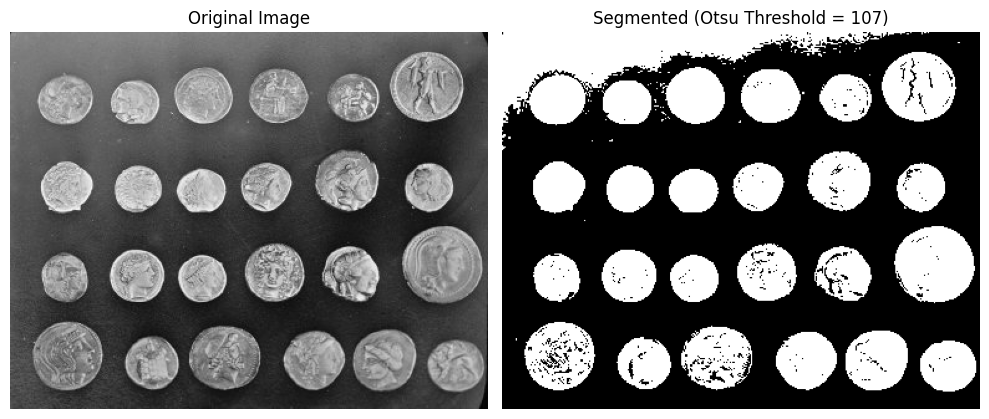

In [1]:
import matplotlib.pyplot as plt
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.util import img_as_ubyte

# Load image
image = coins()
# 'coins' is already grayscale, so we dont need to convert it to grayscale

# Compute Otsu's threshold
thresh = threshold_otsu(image)

# Apply threshold to get binary image
binary = image > thresh

# Plot original and thresholded images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary, cmap='gray')
axes[1].set_title(f'Segmented (Otsu Threshold = {thresh})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Otsu's method finds a global threshold that separates foreground from background by maximizing inter-class variance.
# On images like coins, it does a fair job separating the coins from the background, but shadows or overlapping coins may be problematic.
# Works best when there is a clear bimodal histogram.
# Limitations: fails when the image has varying lighting or uneven background. Use threshold_local in that case.

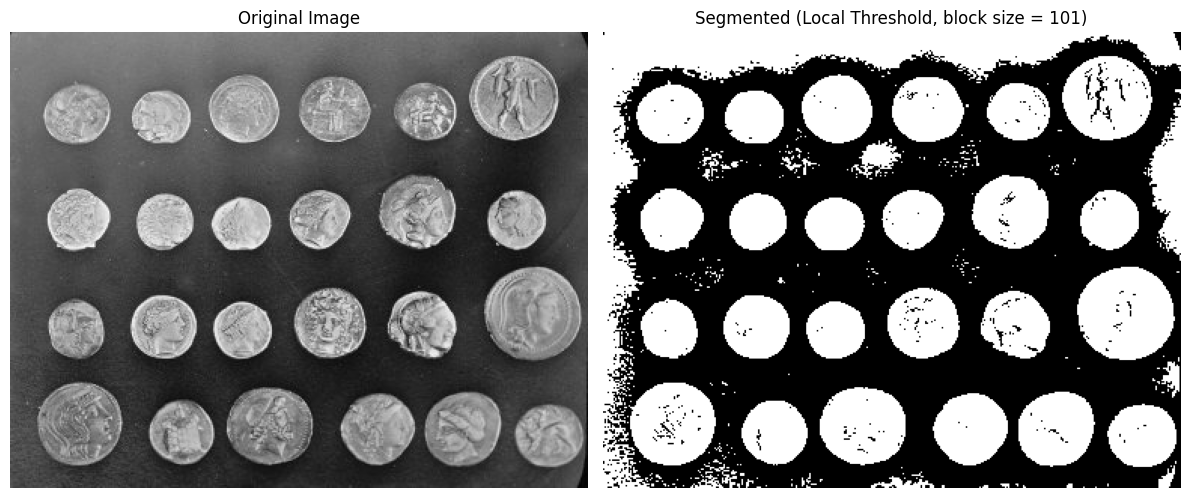

In [5]:
# Trying a different thresold method on th same image: threshold_local
# It computes a threshold for each pixel based on its local neighborhood, which works better when the lighting varies across the image.
# This approach handles shadows and uneven illumination much better than Otsu.
# You'll often get more accurate separation of objects like coins, especially at the edges or under varied lighting.

from skimage.filters import threshold_local

# Apply local thresholding
block_size = 101  # size of the neighborhood
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

# Display original and segmented image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_local, cmap='gray')
axes[1].set_title(f'Segmented (Local Threshold, block size = {block_size})')
axes[1].axis('off')

plt.tight_layout()
plt.show()


🔹 **Task 2:** Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

🔹 **Task 3:** Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

🔹 **Task 4:** Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.
